In [26]:
import pubchempy as pcp

# List of compound IDs
compound_ids = [9926791, 57928403, 59422203, 9602155, 321710, 118115473, 4592, 5325595, 25180101, 5494425]


In [27]:
len(compound_ids)

10

In [28]:
smiles = []
for id in compound_ids:
    compound = pcp.Compound.from_cid(id)
    smiles.append(compound.isomeric_smiles)


In [29]:
len(smiles)

10

In [30]:
import numpy as np
import pandas as pd

## check if external dataset is found in the test train dataset


In [31]:
df = pd.DataFrame({'smiles': smiles, 'compound_id': compound_ids})  

In [32]:
df2 = pd.read_csv('../data/jak3_clean.csv')

In [33]:
df2

,Molecule ChEMBL ID,Smiles,pChEMBL Value
0,CHEMBL385937,Cc1ccc(C(=O)Nc2cccc(C(F)(F)F)c2)cc1-c1ccc2nc(N...,7.70
1,CHEMBL1080111,O=c1[nH]c2cnc(-n3cnc4ccccc43)nc2n1C1CCOc2c(F)c...,7.52
2,CHEMBL1081376,O=c1[nH]c2cnc(-n3cnc4ccccc43)nc2n1C1CCOc2c(Cl)...,6.77
3,CHEMBL3642278,COc1ccc(Nc2nc3c(-c4cn[nH]c4)cccn3n2)cc1,6.29
4,CHEMBL3642348,CN1CCC(c2ccc(Nc3nc4c(Nc5ccccc5S(C)(=O)=O)cccn4...,6.85
...,...,...,...
3269,CHEMBL5201705,C=CC(=O)Nc1cc(Nc2ncc(Cl)c(O[C@@H]3CO[C@H]4[C@@...,8.89
3270,CHEMBL5192736,C=CC(=O)Nc1cc(Nc2ncc(Cl)c(O[C@@H]3CO[C@H]4[C@@...,8.92
3271,CHEMBL5194482,C=CC(=O)Nc1cccc(Cn2c(=O)ccc3cnc(Nc4ccc(N5CCN(C...,8.70
3272,CHEMBL5088804,COc1cc(-c2ccc(O)cc2)cc2cnc(N)nc12,7.40


In [34]:
df['IsPresentInDF2'] = df['smiles'].isin(df2['Smiles'])

df

,smiles,compound_id,IsPresentInDF2
0,C[C@@H]1CCN(C[C@@H]1N(C)C2=NC=NC3=C2C=CN3)C(=O...,9926791,False
1,C1[C@@H]2CC3(C[C@@H](C2NC4=C5C=CNC5=NC=C4C(=O)...,57928403,False
2,CC[C@](C)(C(=O)NCC(F)(F)F)NC1=NC(=NC=C1)C2=CNC...,59422203,False
3,C1CCN(CC1)/C(=N/C2=NC(=NO2)C3=CC=CC=C3)/N,9602155,False
4,C1C2=CC=CC=C2NC1=O,321710,False
5,C[C@H]1CC[C@H](CN1C(=O)C=C)NC2=NC=NC3=C2C=CN3,118115473,False
6,CN1C=NC2=C(N=C(N=C21)NCCO)NCC3=CC=CC=C3,4592,False
7,CN1C2=CC=CC=C2C(=O)C3=C(N=C(N=C31)N)N,5325595,False
8,C[C@H]1CCN(C[C@@H]1N(C)C2=NC=NC3=C2C=CN3)C(=O)...,25180101,False
9,CC(C)(C)C1=NC2=C(N1)C3=C(C=C(C=C3)F)C4=C2C=CNC4=O,5494425,False


In [35]:
df

,smiles,compound_id,IsPresentInDF2
0,C[C@@H]1CCN(C[C@@H]1N(C)C2=NC=NC3=C2C=CN3)C(=O...,9926791,False
1,C1[C@@H]2CC3(C[C@@H](C2NC4=C5C=CNC5=NC=C4C(=O)...,57928403,False
2,CC[C@](C)(C(=O)NCC(F)(F)F)NC1=NC(=NC=C1)C2=CNC...,59422203,False
3,C1CCN(CC1)/C(=N/C2=NC(=NO2)C3=CC=CC=C3)/N,9602155,False
4,C1C2=CC=CC=C2NC1=O,321710,False
5,C[C@H]1CC[C@H](CN1C(=O)C=C)NC2=NC=NC3=C2C=CN3,118115473,False
6,CN1C=NC2=C(N=C(N=C21)NCCO)NCC3=CC=CC=C3,4592,False
7,CN1C2=CC=CC=C2C(=O)C3=C(N=C(N=C31)N)N,5325595,False
8,C[C@H]1CCN(C[C@@H]1N(C)C2=NC=NC3=C2C=CN3)C(=O)...,25180101,False
9,CC(C)(C)C1=NC2=C(N1)C3=C(C=C(C=C3)F)C4=C2C=CNC4=O,5494425,False


# Test model against external test set

In [36]:
import joblib

model = joblib.load('../model_development/best_voting_classifier_model.pkl')

# calcualate rdkit descriptors

In [37]:
import numpy as np
import pandas as pd
import rdkit as rk
from rdkit import Chem 
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

In [38]:
des_list = [x[0] for x in Descriptors._descList]
len(des_list)

208

In [39]:
df['Molecule'] = df['smiles'].apply(Chem.MolFromSmiles)

In [40]:
calculator = MoleculeDescriptors.MolecularDescriptorCalculator(des_list)
descriptors = [calculator.CalcDescriptors(mol) for mol in df['Molecule']]

# Create a new DataFrame with descriptors
descriptors_df = pd.DataFrame(descriptors, columns=des_list)

# Concatenate the original DataFrame with the descriptors DataFrame
df_with_descriptors = pd.concat([df, descriptors_df], axis=1)

# Display the resulting DataFrame
df_with_descriptors

,smiles,compound_id,IsPresentInDF2,Molecule,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,C[C@@H]1CCN(C[C@@H]1N(C)C2=NC=NC3=C2C=CN3)C(=O...,9926791,False,<rdkit.Chem.rdchem.Mol object at 0x282910200>,12.034772,-0.090482,12.034772,0.055180,0.928451,312.377,...,0,0,0,0,0,0,0,0,0,0
1,C1[C@@H]2CC3(C[C@@H](C2NC4=C5C=CNC5=NC=C4C(=O)...,57928403,False,<rdkit.Chem.rdchem.Mol object at 0x282af80b0>,11.877737,-0.462459,11.877737,0.292060,0.692371,326.400,...,0,0,0,0,0,0,0,0,0,0
2,CC[C@](C)(C(=O)NCC(F)(F)F)NC1=NC(=NC=C1)C2=CNC...,59422203,False,<rdkit.Chem.rdchem.Mol object at 0x282af8040>,12.408898,-4.476416,12.408898,0.256976,0.598410,392.385,...,0,0,0,0,0,0,0,0,0,0
3,C1CCN(CC1)/C(=N/C2=NC(=NO2)C3=CC=CC=C3)/N,9602155,False,<rdkit.Chem.rdchem.Mol object at 0x16e6a0e40>,5.976539,0.200858,5.976539,0.200858,0.668445,271.324,...,0,0,0,0,0,0,0,0,0,0
4,C1C2=CC=CC=C2NC1=O,321710,False,<rdkit.Chem.rdchem.Mol object at 0x16e6a1070>,10.788889,0.098333,10.788889,0.098333,0.565349,133.150,...,0,0,0,0,0,0,0,0,0,0
5,C[C@H]1CC[C@H](CN1C(=O)C=C)NC2=NC=NC3=C2C=CN3,118115473,False,<rdkit.Chem.rdchem.Mol object at 0x16e6a10e0>,11.895783,-0.010668,11.895783,0.010668,0.845167,285.351,...,0,0,0,0,0,0,0,0,0,0
6,CN1C=NC2=C(N=C(N=C21)NCCO)NCC3=CC=CC=C3,4592,False,<rdkit.Chem.rdchem.Mol object at 0x16e6a1150>,8.925548,0.027343,8.925548,0.027343,0.637033,298.350,...,0,0,0,0,0,0,0,0,0,0
7,CN1C2=CC=CC=C2C(=O)C3=C(N=C(N=C31)N)N,5325595,False,<rdkit.Chem.rdchem.Mol object at 0x16e6a11c0>,12.358169,-0.170185,12.358169,0.060445,0.562623,241.254,...,0,0,0,0,0,0,0,0,0,0
8,C[C@H]1CCN(C[C@@H]1N(C)C2=NC=NC3=C2C=CN3)C(=O)...,25180101,False,<rdkit.Chem.rdchem.Mol object at 0x16e6a1230>,12.034772,-0.090482,12.034772,0.055180,0.928451,312.377,...,0,0,0,0,0,0,0,0,0,0
9,CC(C)(C)C1=NC2=C(N1)C3=C(C=C(C=C3)F)C4=C2C=CNC4=O,5494425,False,<rdkit.Chem.rdchem.Mol object at 0x16e6a12a0>,13.752710,-0.363923,13.752710,0.153872,0.482368,309.344,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df_final = df_with_descriptors[['MinEStateIndex', 'BCUT2D_MRHI', 'PEOE_VSA12', 'PEOE_VSA6', 'SMR_VSA2',
       'SMR_VSA6', 'SlogP_VSA8', 'VSA_EState5', 'NumAliphaticCarbocycles',
       'NumAromaticCarbocycles', 'NumAromaticRings', 'fr_Ar_N', 'fr_Ar_NH',
       'fr_aniline', 'fr_imidazole']]

In [42]:
df_final.shape

(10, 15)

In [18]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler



# Use MinMaxScaler to normalize the DataFrame
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(df_final), columns=df_final.columns)

In [19]:
df_final

,MinEStateIndex,BCUT2D_MRHI,PEOE_VSA12,PEOE_VSA6,SMR_VSA2,SMR_VSA6,SlogP_VSA8,VSA_EState5,NumAliphaticCarbocycles,NumAromaticCarbocycles,NumAromaticRings,fr_Ar_N,fr_Ar_NH,fr_aniline,fr_imidazole
0,-0.090482,5.869639,5.907180,6.923737,5.261892,25.037095,11.033401,1.213013,0,0,2,3,1,1,0
1,-0.462459,6.055105,0.000000,0.000000,0.000000,5.316789,11.033401,1.120084,4,0,2,2,1,1,0
2,-4.476416,5.916207,5.907180,6.923737,0.000000,11.861545,22.421257,-0.030617,0,0,3,4,1,1,0
3,0.200858,5.796728,11.783959,35.488499,0.000000,13.089513,11.387856,0.975700,0,1,2,2,0,0,0
4,0.098333,5.984467,5.907180,18.199101,0.000000,5.316789,0.000000,0.098333,0,1,1,0,0,1,0
5,-0.010668,5.878355,5.907180,6.578936,0.000000,11.861545,11.033401,0.801189,0,0,2,3,1,1,0
6,0.027343,5.837383,5.948339,30.331835,0.000000,23.785216,11.163878,1.148708,0,1,3,4,0,2,1
7,-0.170185,5.962045,11.377130,12.132734,0.000000,11.467335,21.936326,0.175124,0,1,3,3,0,2,0
8,-0.090482,5.869639,5.907180,6.923737,5.261892,25.037095,11.033401,1.213013,0,0,2,3,1,1,0
9,-0.363923,6.224333,0.000000,20.771212,0.000000,0.000000,32.578298,0.474879,0,2,4,3,2,0,1


In [43]:
pred = model.predict(df_final)

In [44]:
df['pred']= pred

In [45]:
df

,smiles,compound_id,IsPresentInDF2,Molecule,pred
0,C[C@@H]1CCN(C[C@@H]1N(C)C2=NC=NC3=C2C=CN3)C(=O...,9926791,False,<rdkit.Chem.rdchem.Mol object at 0x282910200>,1
1,C1[C@@H]2CC3(C[C@@H](C2NC4=C5C=CNC5=NC=C4C(=O)...,57928403,False,<rdkit.Chem.rdchem.Mol object at 0x282af80b0>,1
2,CC[C@](C)(C(=O)NCC(F)(F)F)NC1=NC(=NC=C1)C2=CNC...,59422203,False,<rdkit.Chem.rdchem.Mol object at 0x282af8040>,1
3,C1CCN(CC1)/C(=N/C2=NC(=NO2)C3=CC=CC=C3)/N,9602155,False,<rdkit.Chem.rdchem.Mol object at 0x16e6a0e40>,1
4,C1C2=CC=CC=C2NC1=O,321710,False,<rdkit.Chem.rdchem.Mol object at 0x16e6a1070>,0
5,C[C@H]1CC[C@H](CN1C(=O)C=C)NC2=NC=NC3=C2C=CN3,118115473,False,<rdkit.Chem.rdchem.Mol object at 0x16e6a10e0>,0
6,CN1C=NC2=C(N=C(N=C21)NCCO)NCC3=CC=CC=C3,4592,False,<rdkit.Chem.rdchem.Mol object at 0x16e6a1150>,1
7,CN1C2=CC=CC=C2C(=O)C3=C(N=C(N=C31)N)N,5325595,False,<rdkit.Chem.rdchem.Mol object at 0x16e6a11c0>,0
8,C[C@H]1CCN(C[C@@H]1N(C)C2=NC=NC3=C2C=CN3)C(=O)...,25180101,False,<rdkit.Chem.rdchem.Mol object at 0x16e6a1230>,1
9,CC(C)(C)C1=NC2=C(N1)C3=C(C=C(C=C3)F)C4=C2C=CNC4=O,5494425,False,<rdkit.Chem.rdchem.Mol object at 0x16e6a12a0>,1


In [46]:

def activity(s):
    if s == 1:
        return "Strong Inhibitor"
    else:
        return "Weak Inhibitor"

In [47]:
df['activity'] = df['pred'].apply(activity)

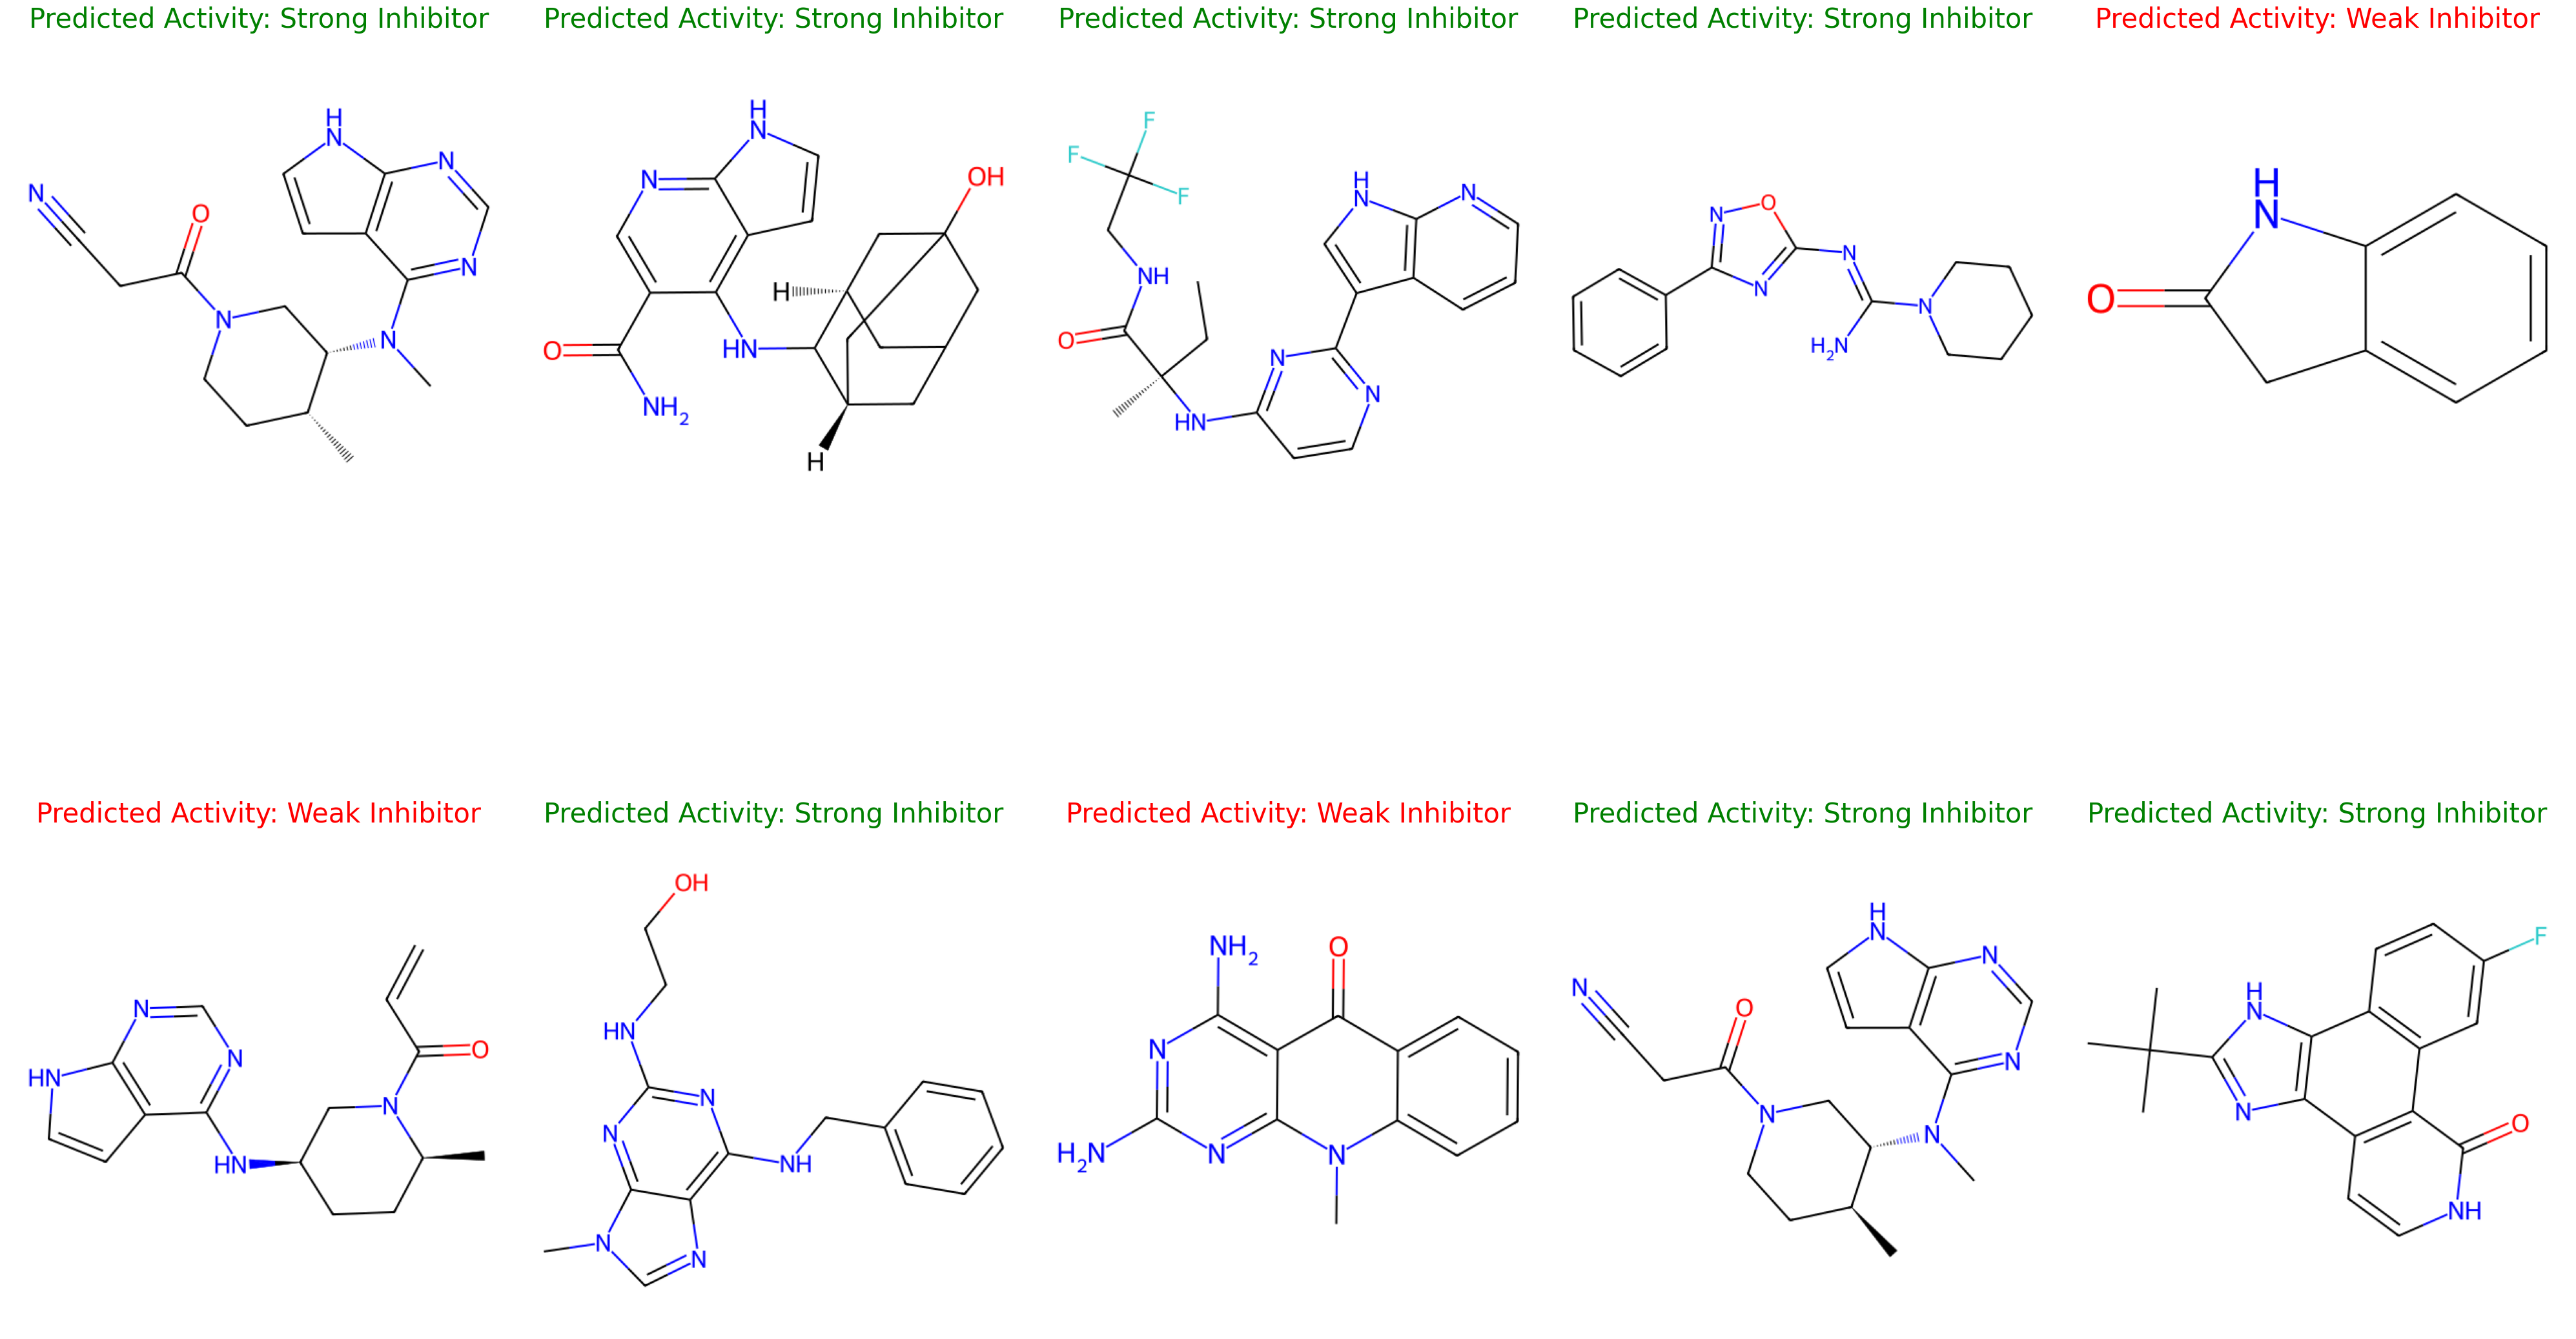

In [48]:
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt

# List of SMILES strings and corresponding molecular weights
smiles_list = df['smiles'].to_list()
activity_list = df['activity'].to_list()


# Calculate the number of rows and columns based on the number of molecules
num_molecules = len(smiles_list)
num_cols = 5  # Set the maximum number of columns to 3
num_rows = 2  # Ceiling division

# Create subplots based on the number of rows and columns
fig, axes = plt.subplots(num_rows, num_cols, figsize=(40, 30),)

plt.subplots_adjust(hspace=0.1)

# Iterate over each SMILES and molecular weight
for i, (smiles, activity) in enumerate(zip(smiles_list, activity_list)):
    # Load the molecule from SMILES
    molecule = Chem.MolFromSmiles(smiles)
    
    # Draw the molecule
    img = Draw.MolToImage(molecule, size=(500, 500))
    
    # Display the molecular weight on the image
    if num_rows > 1:  # If there are multiple rows, access the correct subplot
        ax = axes[i // num_cols, i % num_cols]
    else:
        ax = axes[i % num_cols]
    
    ax.imshow(img)
    ax.set_title(f'Predicted Activity: {activity}', fontsize=30, color='red' if activity == "Weak Inhibitor" else 'green')

    ax.axis('off')

# Save or show the image
plt.tight_layout()
plt.savefig('../result_images/predicted_activities_for_external_test_set.png' )
plt.show()
